## 1. Import Libraries

In [46]:
#! pip install numpy matplotlib sounddevice pandas soundfile scipy

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import hann

## 2. Load the data from the CSV file

In [48]:

data = pd.read_csv('annual_data.csv')

## 3. Variables

In [49]:
duration = 0.005
fade_time = duration * 0.1
sr = 44100
audio = 'sonified_audio.wav'
plot = 'sonification_plot.png'

## 4. Sonify data

### 4.1 Extract the 'YEAR' and 'ANNUAL' columns from the dataset

In [50]:
years = data['YEAR']
annual_data = data['ANNUAL']

### 4.2 Create a time array

In [51]:
t = np.linspace(0, duration, int(duration * sr), endpoint=False)

### 4.3 Create empty arrays

In [52]:
# Create a fade array
fade_samples = int(fade_time * sr)
fade_window = hann(fade_samples * 2)[:fade_samples]

# Create an empty array to store the sonified signal
sonified_signal = np.array([])

# Create empty lists to store the x and y values for the scatter plot
scatter_x = []
scatter_y = []

### 4.4 Sonify each data point using a sine wave and apply smooth start and end

In [53]:
for year, data_point in zip(years, annual_data):
    # Map the data point to frequency (adjust as needed)
    frequency = data_point * .5  

    # Apply smooth start and end using fade-in and fade-out
    fade_in = np.linspace(0, 1, fade_samples)
    fade_out = np.linspace(1, 0, fade_samples)

    tone = np.sin(2 * np.pi * frequency * t)
    tone[:fade_samples] *= fade_in
    tone[-fade_samples:] *= fade_out

    sonified_signal = np.concatenate([sonified_signal, tone])

    # Repeat the year value for each sample in the data point
    scatter_x.extend([year] * len(t))
    scatter_y.extend([frequency] * len(t))

## 5. OUPUT

### 5.1 Write the audio file

In [54]:
# Normalize the sonified signal
sonified_signal /= np.max(np.abs(sonified_signal))

# Save the sonified signal as a WAV audio file
wav = sf.write(audio, sonified_signal, sr)

### 5.2 Listen Audio

In [55]:
import IPython.display as ipd
ipd.Audio(audio)

### 5.3. Create a scatter plot of frequencies over time

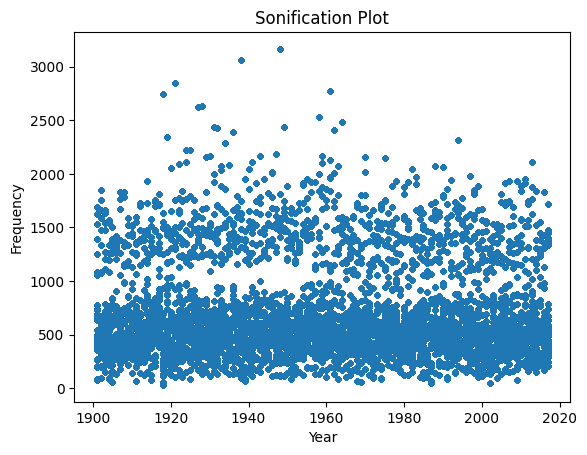

In [56]:
plt.scatter(scatter_x, scatter_y, marker='o', s=10)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Sonification Plot')
plt.show()
plt.savefig(plot)
plt.close()